<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: Probability and distributions
© ExploreAI Academy

In this notebook, we'll cover statistical concepts, probability, and different types of distributions that can be used to analyse data using the `scipy.stats` package script in Python.


## Learning objectives

By the end of this notebook, you should be able to:
- Distinguish between inferential and descriptive statistics.
- Describe and identify the different variable and data types.
- Utilise the stats package `scipy.stats` in python.
- Understand the concepts of random variables.
- Understand probability functions.
- Differentiate and explain different distributions.

## Table of contents

1. [Descriptive and inferential statistics](#descriptive-and-inferential-statistics)
2. [Variables and data types](#variables-and-data-types)
3. [Probability - the chance of everything happening](#probability---the-chance-of-everything-happening)
4. [Probability mass and probability density functions](#probability-mass-and-probability-density-functions)

6. [Distributions in statistics](#distributions-in-statistics)
   * [Normal distribution](#normal-distribution)
   * [Binomial distribution](#binomial-distribution)
   * [Poisson distribution](#poisson-distribution)
   * [Negative binomial distribution](#negative-binomial-distribution)
   * [Exponential distribution](#exponential-distribution)
   * [Uniform distribution](#uniform-distribution)


## Introduction

Within the realm of data, probabilities and distributions are extremely important. These concepts will provide a vital basis when moving on to related technical fields such as machine learning, modeling, and algorithmic development.  

## Descriptive and inferential statistics

The two main branches of statistics are **descriptive** and **inferential** statistics.  

The best comparison between the two is described in Keone Hon's *Introduction to Statistics*: "Descriptive statistics is used to say something about a set of information that has been collected only. Inferential statistics is used to make predictions or comparisons about a larger group (a population) using information gathered about a small part of that population. Thus, inferential statistics involves generalizing beyond the data, something that descriptive statistics does not do."

### Descriptive statistics

Descriptive statistics summarise and describe the main features of a dataset. This includes **measures of central tendency** (mean, median, mode) and **measures of variability** (range, variance, standard deviation).

Let's examine a simple dataset on deforestation rates in various regions to calculate basic descriptive statistics for the year 2020.

In [2]:
# Example 1

import pandas as pd
import numpy as np

# Deforestation rates (in hectares) in various regions
data = {
    'Region': ['Amazon', 'Congo', 'Southeast Asia', 'Boreal Forests'],
    'Deforestation_rate_2020': [1000, 500, 750, 200],  # Ratio variable
    'Deforestation_rate_2021': [800, 450, 700, 150],  # Ratio variable, assuming a decrease
    'Region_type': ['Tropical', 'Tropical', 'Tropical', 'Temperate']  # Nominal variable
}
df = pd.DataFrame(data)

# Calculate basic descriptive statistics
descriptive_stats = df['Deforestation_rate_2020'].describe()
print(descriptive_stats)

count       4.00000
mean      612.50000
std       342.47871
min       200.00000
25%       425.00000
50%       625.00000
75%       812.50000
max      1000.00000
Name: Deforestation_rate_2020, dtype: float64


### Inferential statistics

Inferential statistics involve making predictions or inferences about a population based on a sample of data. It includes hypothesis testing, confidence intervals, and regression analysis.

Building on our descriptive statistics, let's test the hypothesis that deforestation rates have decreased in 2021 due to new environmental policies by comparing 2020 and 2021 data.


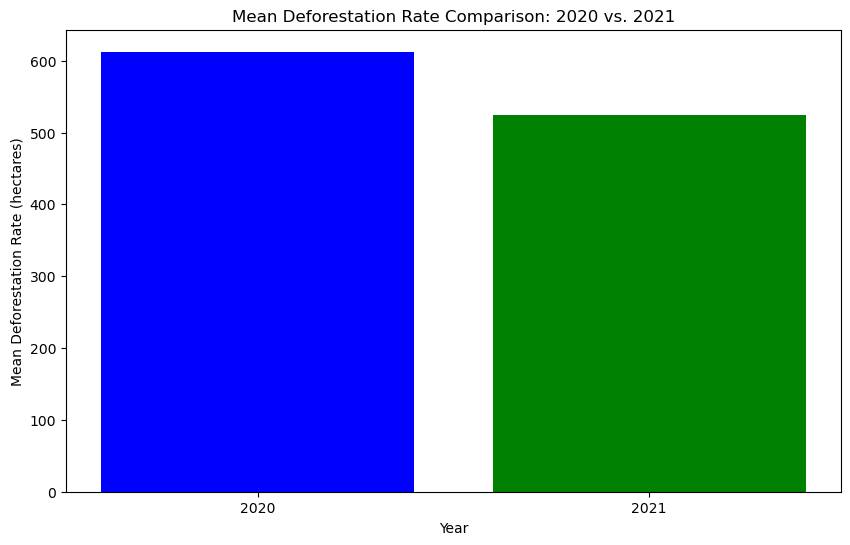

In [3]:
# Example 2

import matplotlib.pyplot as plt

# Calculate mean deforestation rates for 2020 and 2021
mean_deforestation_2020 = np.mean(df['Deforestation_rate_2020'])
mean_deforestation_2021 = np.mean(df['Deforestation_rate_2021'])

# Data for plotting
years = ['2020', '2021']
means = [mean_deforestation_2020, mean_deforestation_2021]

plt.figure(figsize=(10, 6))
plt.bar(years, means, color=['blue', 'green'])
plt.xlabel('Year')
plt.ylabel('Mean Deforestation Rate (hectares)')
plt.title('Mean Deforestation Rate Comparison: 2020 vs. 2021')
plt.xticks(years)
plt.show()


The result suggests that there might have been an improvement in the deforestation situation from 2020 to 2021, potentially due to new environmental policies or other factors.

However, while the bar chart provides a straightforward visual comparison, it does not indicate whether the difference in means is statistically significant. To confirm if the observed difference is not due to random variation, a statistical test like the **t-test**, which is beyond the scope of this notebook, would be required

## Variables and data types

In statistics, variables can be classified into 2 wide classes:
1. **Categorical** 
2. **Numeric**

**In the Categorical class, we have:**
1. **Nominal Data**
- Binary Data - two distinct outcomes (yes/no or true/false)
- Categorical Data -  many data types (primary/secondary/tertiary)

2. **Ordinal Data** - A number used in scoring that implies an order. An example is a rank from Low to High 


**In the Numeric class, we have:**
1.  **Continuous Data** 
- Interval (numerical) data  - Lacks an absolute zero point (temperature in Celsius, year)
- Ratio - variable with any number (Rainfall, time, temperature in Kelvin)

2.  **Discrete Data** - variables which hold a whole number; can be used as a counting number (Number species in a forest)

Let's add more data to our dataset:

In [4]:
df['Average_Rainfall_mm'] = [2300, 1600, 2500, 500]  
df['Protected_Area'] = [True, False, True, True]  
df['Biodiversity_Index'] = [8.5, 7.0, 9.0, 6.5]  
df['Conservation_Status'] = ['High', 'Medium', 'Low', 'Medium']  
# Mapping ordinal variable to an ordered numerical representation
conservation_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Conservation_Status_Mapped'] = df['Conservation_Status'].map(conservation_mapping)

print(df)

           Region  Deforestation_rate_2020  Deforestation_rate_2021  \
0          Amazon                     1000                      800   
1           Congo                      500                      450   
2  Southeast Asia                      750                      700   
3  Boreal Forests                      200                      150   

  Region_type  Average_Rainfall_mm  Protected_Area  Biodiversity_Index  \
0    Tropical                 2300            True                 8.5   
1    Tropical                 1600           False                 7.0   
2    Tropical                 2500            True                 9.0   
3   Temperate                  500            True                 6.5   

  Conservation_Status  Conservation_Status_Mapped  
0                High                           3  
1              Medium                           2  
2                 Low                           1  
3              Medium                           2  


We've introduced an ordinal variable, `Conservation_Status`, to rank regions based on their conservation priority. This variable has an inherent order: Low < Medium < High. We then map these ordinal values to numbers to facilitate statistical analysis, demonstrating a common technique for handling ordinal data in Python.

Understanding these variable types and their implications is crucial for accurately analysing and interpreting data. For instance, when analysing deforestation rates, knowing that these rates are ratio variables allows us to calculate meaningful ratios, averages, and perform other statistical analyses that depend on a true zero point. Similarly, recognizing `Region_type` as a nominal variable informs us that statistical tests for independence might be appropriate for analysing relationships involving this variable.

## Probability - the chance of everything happening

This section is going to introduce the world of probability and illustrate how powerful python packages can help to compute the numbers related to probability. 

It's useful to take a look at basic probalities in *Chapter 3* of [Keone's textbook](https://www.fd.cvut.cz/department/k611/PEDAGOG/THO_A/A_soubory/statistics_firstfive.pdf).
We can also see how those concepts are implemented in python [here](https://www.datacamp.com/community/tutorials/statistics-python-tutorial-probability-1).

Let's start off by importing some important packages in python:

In [5]:
import numpy as np
import scipy.stats as st #Read this documentation and refer to documentation on the super stats package
import matplotlib.pyplot as plt

### Random Variables 

In probability theory, we define the concept of the sample space $S$ as the set of all possible events; we can think of this as representing all of the possible outcomes of an experiment whose outcome is unknown at the outset. For example, getting dressed in the morning, we reach blindly into the drawer to pull out a pair of socks, knowing that there are white, black and blue socks in there.

We can think of this as an experiment: we know what all the possible outcomes are, and if we know something about how many pairs of each colour sock we own, we also know something about the probabilities of those outcomes. But we don't know the actual outcome until we pull our hand back out and examine the pair of socks it's clutching.

We can define a variable $X$ to stand for the values of the possible outcomes. This $X$ is what we define as a **random variable**: one which can take on a range of possible values and whose actual value is unknown until completion of the experiment.

Other classic examples include the tossing of a coin or the rolling of a die.

### Discrete Random Variables 

Discrete random variables can only take on specific values. Our sock, coin and die examples above are all discrete: the possibilities are {white, black,blue}, {heads, tails} and {1, 2, 3, 4, 5, 6} respectively.

Usually, we'll be looking at problems where the outcomes are real numbers, as in the die example. Where they're not, as in the coin example, we would usually proceed by assigning a numeric value to each of the possible outcomes, e.g. 1 for heads and 2 for tails. Most common discrete random variables take on integer values, but that's not necessarily the case: if there are either 2 or 3 people coming to share a pizza with me, and we share equally, then the possible outcomes for me are one-quarter and one-third of a pizza.

## Probability mass and probability density functions

We need some mathematical language to describe the probabilities of the various possible outcomes of random variables (what we refer to as **probability distributions**). Random variables have functions which map their outcomes onto their corresponding probabilities. These are most easily described in the case of discrete random variables, whose **probability mass functions** $p(x)$ directly map a given outcome $x$ onto the probability of $x$ being observed in a given trial.

There are three conditions which a probability mass function (PMF) must fulfill:

1. $p(x)$ is defined for all $x$, but $p(x)>0$ only for a finite set of points. (Or countably infinite set of points, but that's a subtlety we can happily ignore at this stage.)

2. $0 \le p(x) \le 1$ for all $x$. Intuitively, the bounds on a probability are 0 for an outcome that can never be observed and 1 for a certain outcome.

3. $\displaystyle \sum_x p(x) = 1$. Observing one of the range of all possible outcomes is certain, and hence probabilities must sum to 1.

Consider the coin toss, coding heads as 1 and tails as 2. We have that $p(1) = p(2) = 0.5$ and $p(x) = 0$ for all $x \neq 1,2$, hence all three conditions hold and the probability mass function for the coin toss is a valid PMF.

**Continuous random variables** are a little more tricky, conceptually. For discrete variables, the probability mass function tells us directly the probability of individual outcomes, or (by summing) of groups of outcomes. 

For example, the PMF for the roll of a die is $p(x) = 1/6$ for $x \in 1, 2, 3, 4, 5, 6$. 

We can see directly that there is a one-in-six chance of rolling a three, or a 50% chance $(1/6 + 1/6 + 1/6)$ of rolling a four or above. But for continuous random variables, the probability of achieving a very specific outcome is in fact zero. This sounds a little counter-intuitive, I know, but it has to do with the infinite divisibility of outcomes. 
Therefore, for a continuous random variable, we must think in terms of the probability of achieving an outcome between two limits. For example, for the 400m world record, we could think of the probability of Wayde van Niekerk running another 43.03 second race, rounded to the nearest hundredth of a second, as the probability of time between 43.025 and 43.035 seconds.

We, therefore, can't directly define a probability mass function for continuous random variables; instead, we define what is known as a **probability density function** (PDF). There are also three conditions for PDFs which are conventionally written as $f(x)$:

1. $f(x)$ must be defined for all values of $x$.

2. All values of $f(x)$ are non-negative (note there is no upper bound on this, unlike $p(x)$ for a discrete random variable).

3. Finally, $\displaystyle \int_{-\infty}^{\infty} f(x) dx = 1$.

The last condition is the equivalent of the requirement that all probability masses sum to 1 for a discrete random variable. Probabilities for continuous variables are found by integration, which is after all the continuous analogue to summation, and this condition enforces that the integral of the probability densities over all possible values of $x$ comes to 1, as necessary for a valid probability distribution. To continue with our 400m example, we would evaluate the probability we're after by integrating between 43.025 and 43.035 seconds. We'd find the probability of Wayde breaking his own world record by integrating over the interval 0 (or negative infinity, but negative times are of course not possible so we can safely ignore this part of the real number line) to 43.025 seconds.

### Cumulative distribution functions

Cumulative distribution functions (CDFs, or just distribution functions), usually denoted $F(x)$, give the probability that a random variable $X$ takes on a value less than or equal to some given value $x$. In other words, $$F(x) = P(X \le x).$$

Before reading further, let's see if we can figure out how $F(x)$ would be defined for a discrete and a continuous random variable respectively.

That's right: for a discrete variable it would be 

$$F(x) = \sum_{t \le x} p(t),$$ 

and for a continuous random variable we would define the distribution function as 

$$F(x) = \int_{-\infty}^x f(t) \: dt.$$


If CDFs are still not quite clear, go to [this link](https://www.countbayesie.com/blog/2015/4/4/parameter-estimation-the-pdf-cdf-and-quantile-function) for another explanation of CDF's 

## Distributions in statistics
There are several types of distributions in statistics, each with its applications and assumptions. Key distributions include Normal, Binomial, Poisson, and Exponential.

### Normal distribution

The Normal distribution, also known as the Gaussian distribution, is a cornerstone of statistical analysis and probability theory due to its **ubiquitous presence in natural and social phenomena**. Its significance lies in the **Central Limit Theorem**, which states that the sum of many independent random variables, each with finite mean and variance, will tend to follow a Normal distribution, regardless of the original distribution of the variables. Here are the key features and the mathematical representation of the Normal distribution:

1. **Symmetry**: The Normal distribution is perfectly symmetrical around its mean. This symmetry means that the mean, median, and mode of the distribution are equal.
2. **Bell-shaped curve**: It has a distinctive bell-shaped curve, where the probability density decreases rapidly and symmetrically as one moves away from the mean in either direction.
3. **Defined by two parameters**: The shape of the Normal distribution is completely specified by two parameters—its mean ($(\mu)$) and its standard deviation ($(\sigma)$). The mean determines the location of the center of the graph, and the standard deviation determines the height and width of the graph.

4. **Asymptotic**: The tails of the Normal distribution curve approach, but never touch, the horizontal axis. This indicates that no matter how far one moves away from the mean, the probability density never actually reaches zero.

5. **Inflection points**: The curve has inflection points at $(\mu - \sigma)$ and $(\mu + \sigma)$, where the curvature changes direction.


**Mathematical representation**

The probability density function (PDF) of the Normal distribution for a random variable \(X\) is given by:

$$ f(x) = \displaystyle \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right) ^2} $$

where:
- $(x)$ is the value of the random variable,
- $(\mu)$ is the mean of the distribution,
- $(\sigma)$ is the standard deviation of the distribution, and
- $(e)$ is the base of the natural logarithm (\(\approx 2.71828\)).

**Properties and usage**

- **Standard normal distribution**: When $(\mu = 0)$ and $(\sigma = 1)$, the Normal distribution is called the Standard Normal Distribution. It is often denoted by $(Z)$ and is used as a reference to transform other Normal distributions using Z-scores. The PDF is shown below:

$$ \phi(x) = \displaystyle \frac{1}{\sqrt{2 \pi}} e^{-\frac{1}{2} x^2} $$

- **68-95-99.7 Rule (Empirical Rule)**: About 68% of the data falls within one standard deviation of the mean ($(\mu \pm \sigma)$), 95% within two standard deviations ($(\mu \pm 2\sigma)$), and 99.7% within three standard deviations ($(\mu \pm 3\sigma)$).

- **Applicability**: The Normal distribution is used in numerous statistical methods, including hypothesis testing, confidence intervals, and regression analysis. It's also fundamental in the natural and social sciences to describe real-world phenomena where the distribution of variables tends to be symmetrically distributed around a central value.

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
    <img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Normal-distribution-68-95-99-rule.png"  style="width:70%";/>
    <br>
    <br>
    <em>Figure 1: Normal distribution</em>
</div>

The Normal distribution's mathematical elegance and practical applicability make it a pivotal concept in statistics, underlying many statistical methods and theories.

We can use first principles, rather than other built-in functions to show how the density function can be plotted for different mu and sigma values.

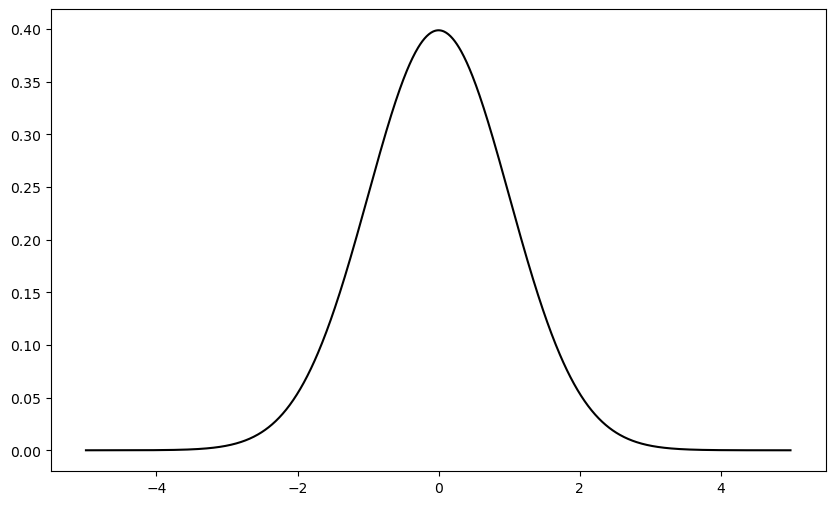

In [6]:
# Standard normal distribution plot
x = np.arange(-5,5,0.01)     # range of values for z
mu = 0                       # mu = 0 for standard normal
sigma = 1                    # mu = 1 for standard normal

# now calculate f(x)
f = 1 / np.sqrt ((2 * np.pi * sigma ** 2)) * np.exp (-0.5 * ((x - mu) / sigma) ** 2)

plt.figure(figsize=(10, 6))
plt.plot(x,f,'k')
plt.show()

Notation-wise, if $X$ is normally distributed with mean $\mu$ and standard deviation $\sigma$, then we denote this as $X \sim N(\mu, \sigma^2)$. Note that the second parameter is by convention shown as $\sigma^2$ rather than $\sigma$ - this is the variance of the distribution. 

Remember that for continuous random variables, to calculate the probability of an outcome in a particular range, we need to use the **cumulative distribution function**. As we've seen above, this requires integrating the **PDF**. While that is currently beyond the scope of this course, more information on integration is available here: https://en.wikipedia.org/wiki/Numerical_integration). Fortunately, Python and `scipy` provide functions for us to evaluate PDFs without the need to integrate or even use the numerical tables that are sometimes provided. 

Let's define a function to calculate the probability of observation following the above distribution lying between arbitrary bounds $x_1$ and $x_2$, and then use that to calculate the probability of observation between 2 and 5. We use the simple logic here that the probability we're after is the probability of observation of less than $x_2$, less the probability of an observation less than $x_1$.

In [7]:
def normal_prob (x1, x2, mu, sigma):
    return (st.norm.cdf (x2, mu, sigma) - st.norm.cdf (x1, mu, sigma))

normal_prob(2, 5, mu, sigma)

0.022749845296607285

#### Further examples using `scipy.stats` in Python

**Example 1**

Now, suppose a study has shown that the optimal temperature range for the growth of a particular tree species involved in reforestation is between 18°C and 22°C. Temperatures outside this range can slow down growth or even cause stress to the trees.

Using the Normal distribution, we can calculate not just the probability of exceeding a certain temperature but also the likelihood that the temperature will fall within the optimal range for tree growth.

In [8]:
# Add temperature data
df['Average_Temperature'] = [25, 24, 27, -5]  # Average annual temperature (°C)
df['Temperature_Std_Dev'] = [2, 1.5, 2.5, 3]  # Standard deviation of temperature

To analyse the impact of temperature variations on deforestation, we will model the temperature of each region using the Normal distribution. This approach allows us to assess the likelihood of extreme temperature conditions that could exacerbate or mitigate deforestation rates.

For instance, we can calculate the probability of experiencing temperatures above a certain threshold that might lead to increased deforestation due to factors like increased fire risk or altered rainfall patterns.

The `norm` function from the `scipy.stats` module represents the normal (Gaussian) distribution. The `norm` function provides several methods for working with the normal distribution, including calculating probabilities, generating random variables, and more.

In [9]:
from scipy.stats import norm
# Example: Probability of experiencing temperatures above 30°C in Southeast Asia
region = 'Southeast Asia'
mean_temp = df[df['Region'] == region]['Average_Temperature'].values[0]
std_dev_temp = df.loc[df['Region'] == region, 'Temperature_Std_Dev'].values[0]

# Probability of temperature exceeding 30°C
prob_above_30 = 1 - norm.cdf(30, mean_temp, std_dev_temp)
print(f"Probability of temperature above 30°C in {region}: {prob_above_30:.2f}")


Probability of temperature above 30°C in Southeast Asia: 0.12


**Example 2**

Suppose we're interested in understanding the effectiveness of recent conservation initiatives. Based on our preliminary analysis, we estimate that the mean reduction in deforestation rates since implementation is **250 hectares**, with a standard deviation of **50 hectares**. We are particularly interested in calculating the probability of observing a reduction greater than **300 hectares** in a region, as this would indicate a highly effective conservation effort.

To conduct this analysis, we will use the `norm.cdf` function from the `scipy.stats` package in Python, which will allow us to calculate the cumulative distribution function for a normal distribution. This approach will enable us to determine the likelihood of achieving a deforestation rate reduction of more than **300 hectares**, providing us with valuable insights into the effectiveness of conservation initiatives across the studied regions.

In [10]:
# Example: Probability of deforestation rate reduction
from scipy.stats import norm

# Assuming deforestation rate reduction follows a normal distribution
mean_reduction = 250  # Mean reduction in hectares
std_deviation = 50  # Standard deviation

# Probability of observing a reduction greater than 300 hectares
prob_greater_than_300 = 1 - norm.cdf(300, mean_reduction, std_deviation)
print(f"Probability of reduction greater than 300 hectares: {prob_greater_than_300:.2f}")

Probability of reduction greater than 300 hectares: 0.16


The `cdf` method of the `norm` function stands for **Cumulative Distribution Function**. It gives the probability that a normally distributed random variable with the specified mean and standard deviation is less than or equal to a given value.
* `norm.cdf(300, mean_reduction, std_deviation)` calculates the probability that the reduction is less than or equal to 300 hectares.
* Subtracting this value from 1 gives the probability of the reduction being greater than 300 hectares because the total probability (the sum of the probability of an event and its complement) equals 1.
* If we were interested in seeing whether the reduction being less than 300, the answer would be given by `norm.cdf(300, mean_reduction, std_deviation)`

### Binomial distribution
The Binomial distribution is a foundational concept in statistics, particularly useful in scenarios where we have a **series of independent experiments or trials** with two possible outcomes: **success** or **failure**. This distribution allows for the calculation of the probability of obtaining a specific number of successes in a fixed number of trials, assuming each trial is independent and the probability of success remains constant throughout the trials. 
 
Key properties of the Binomial distribution include;
1. **Discreteness**: The Binomial distribution is discrete, meaning it calculates the probabilities of achieving a certain number of successes in a series of independent trials or events.
2. **Fixed number of trials**: The total number of trials (n) is fixed in advance. Each trial is independent of the others, and the outcome of one trial does not affect the outcomes of the other trials.
3. **Binary outcomes**: Each trial has only two possible outcomes, commonly referred to as "success" and "failure". The probability of success (p) is constant for each trial.
4. **Probability of success**: The probability of success on a single trial is denoted by p, while the probability of failure is denoted by q, where q = 1 - p.
5. **Sum of Bernoulli trials**: A Binomial distribution can be thought of as the sum of n independent Bernoulli trials, each with the same probability of success p.


<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
    <img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/binomial-distribution.png"  style="width:70%";/>
    <br>
    <br>
    <em>Figure 2: Binomial distribution</em>
</div>

**Mathematical representation**

The probability of obtaining exactly k successes in n trials is given by the formula:

$ P(X = k) = \binom{n}{k} p^k (1-p)^{n-k} $

where:
- $(P(X = k))$ is the probability of getting exactly k successes,
- $(\binom{n}{k})$ is the binomial coefficient, representing the number of ways to choose k successes from n trials,
- $(p)$ is the probability of success on a single trial, and
- $((1-p))$ is the probability of failure on a single trial.

Consider a conservation project monitoring the presence of a certain endangered species in a set of habitat areas. Each area is checked for the presence of the species, with each check considered an independent trial.

- **n**: 50 habitat areas are surveyed.
- **p**: The probability of finding the species in any given area is 0.2 (20%).

Using the Binomial distribution, we can calculate the probability of finding the species in exactly 10 of the 50 areas.

In [11]:
from scipy.stats import binom
k = 10
n = 50  # Number of trials
p = 0.2  # Probability of success

# Probability of exactly 10 successes (finding the species in 10 areas)
prob_exactly_10 = binom.pmf(k, n, p)
print(f"Probability of finding the species in exactly 10 out of 50 areas: {prob_exactly_10:.4f}")

Probability of finding the species in exactly 10 out of 50 areas: 0.1398


This calculation helps in understanding the likelihood of various outcomes, aiding in the assessment of conservation efforts' effectiveness and the planning of future actions based on probabilistic models.

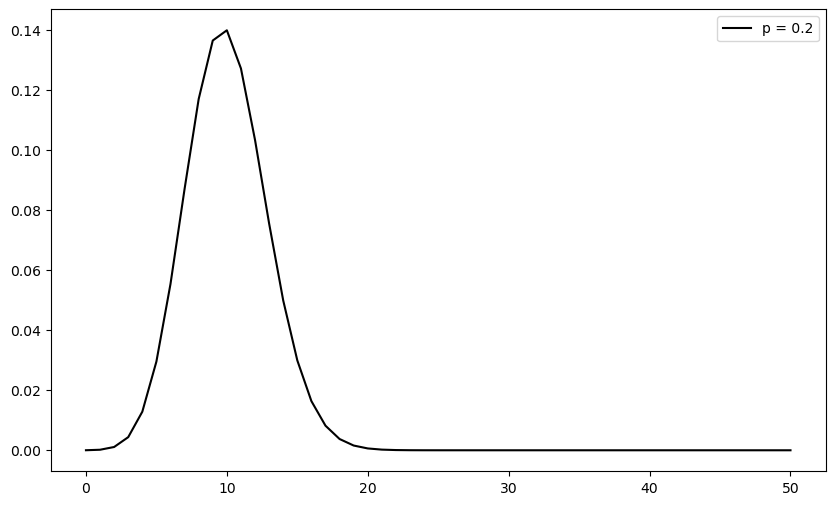

In [12]:
# The PMF 
n = 50
x = np.arange(0,51)
p1 = 0.2
px1 = st.binom.pmf(x, n, p1)

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x, px1, 'k', label = 'p = 0.2')
plt.legend()
plt.show()

### Poisson distribution

The Poisson distribution is particularly useful for modelling the number of events occurring within a fixed interval of time or space when these events happen **independently** of each other at a **constant average rate**. It's an ideal tool for analysing count data where the events are discrete and the number of occurrences in any given interval can range from zero to potentially infinity. 

Key characteristics of the Poisson distribution include:

1. **Events occur independently**: The occurrence of one event does not affect the probability of another event occurring.
2. **Constant average rate**: Events occur at a constant mean rate ($\lambda$) over time or space.
3. **Discrete outcomes**: The number of events is counted in whole numbers.
4. **Unbounded upper limit**: There's no maximum limit to the number of events that can occur in the given interval. (let n→∞ )

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
    <img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/poisson-distribution.png"  style="width:70%";/>
    <br>
    <br>
    <em>Figure 3: Poisson distribution</em>
</div>

**Mathematical representation**

The notation $X \sim P(\lambda)$ (that symbol $\sim$ is read "is distributed") signifies that $X$ follows the Poisson distribution with parameter $\lambda$.

The probability of observing exactly \(k\) events in a fixed interval is given by the formula:

$ P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!} $

where:
- $(P(X = k))$ is the probability of observing exactly \(k\) events,
- $(\lambda)$ is the average rate (mean) of events per interval,
- $(e)$ is the base of the natural logarithm (approximately 2.71828),
- $(k!)$ is the factorial of \(k\).

Suppose an environmental agency has recorded an average rate $(\lambda)$ of 5 illegal logging incidents per month in a particular region. We can use the Poisson distribution to calculate the probability of observing a specific number of incidents in a given month, which can inform enforcement and reforestation planning.

In [13]:
from scipy.stats import poisson

lambda_illegal_logging = 5  # Average number of illegal logging incidents per month

# Probability of observing exactly 3 illegal logging incidents in a month
prob_exactly_3 = poisson.pmf(3, lambda_illegal_logging)
print(f"Probability of observing exactly 3 illegal logging incidents in a month: {prob_exactly_3:.4f}")

Probability of observing exactly 3 illegal logging incidents in a month: 0.1404


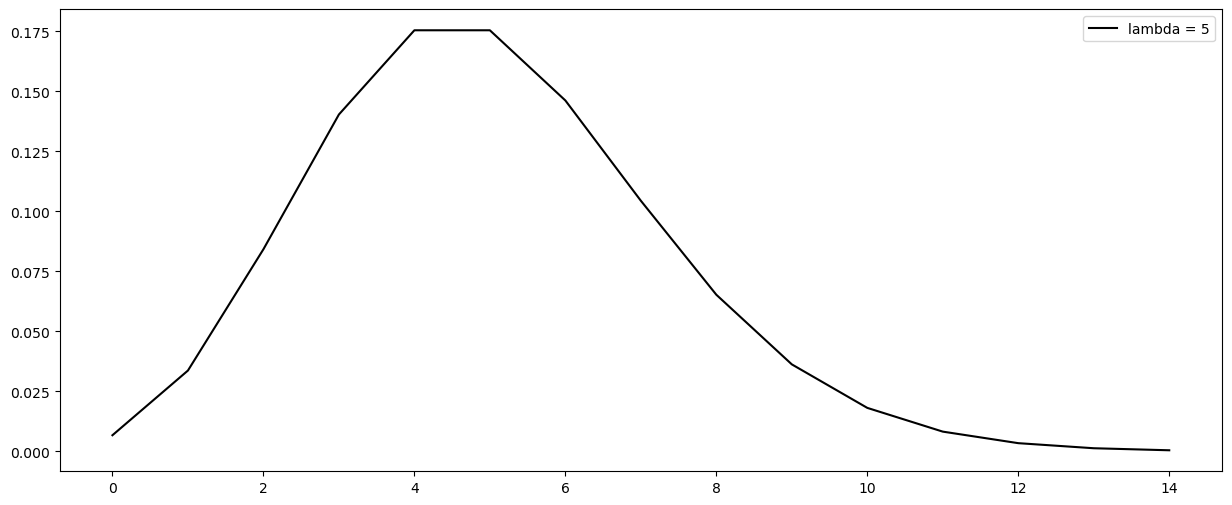

In [16]:
# Looking at the PMF for this distribution
poisson_lambda = 5
x = np.arange(0,15)
px = st.poisson.pmf(x, poisson_lambda)

plt.rcParams["figure.figsize"] = (15,6)
plt.plot(x, px, 'k', label = 'lambda = 5')
plt.legend()
plt.show()

Understanding the frequency of illegal logging incidents can help tailor reforestation efforts. For example, if the probability of a high number of incidents in certain months is significant, additional resources could be allocated for surveillance and reforestation during or following those periods.

In [17]:
# Probability of observing more than 7 illegal logging incidents in a month
prob_more_than_7 = 1 - poisson.cdf(7, lambda_illegal_logging)
print(f"Probability of observing more than 7 illegal logging incidents in a month: {prob_more_than_7:.4f}")

Probability of observing more than 7 illegal logging incidents in a month: 0.1334


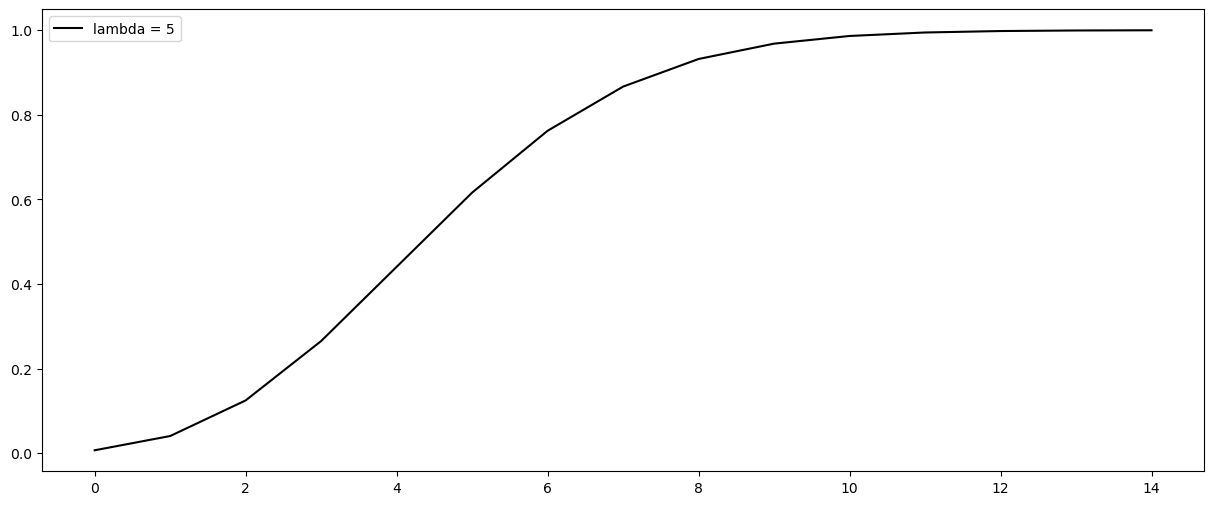

In [18]:
# Displaying the cumulative density function for this distribution
poisson_lambda = 5
x = np.arange(0,15)
px = st.poisson.cdf(x, poisson_lambda)

plt.rcParams["figure.figsize"] = (15,6)
plt.plot(x, px, 'k', label = 'lambda = 5')
plt.legend()
plt.show()

This analysis assists in strategically planning reforestation projects, ensuring they are timed and resourced in a manner that accounts for the impact of illegal logging, thereby maximizing the success rate of reforestation efforts.

### Negative binomial distribution

Suppose once again that we have a binomial process, where each trial is either a success or a failure. If we let $X$ represent the number of **failures** that occur before we hit a specific number of **successes**, usually denoted $r$, and $p$ is the **probability of success** on each trial, then $X \sim NB(r,p)$, i.e. $X$ follows the negative binomial distribution with parameters $r$ and $p$ and has PMF:

\begin{align}
p(x) & = \binom{x+r-1}{x} p^r (1-p)^{x} & & \text{for } x = 0, 1, \ldots, n\\
     & = 0 & & \text{otherwise}
\end{align}

This PMF can be derived in an approach that is similar to the one used for the binomial distribution. Intuitively, each possible path that takes us to $r$ successes and $x$ failures must have probability $p^r (1-p)^x$. How many such combinations are there? Well, remember first of all that by our definition, the last trial must have been a success, so in the previous $x+r-1$ trials we will have had $x$ failures. 

There are $\binom{x+r-1}{x}$ ways of arranging these
$x$ failures and $r-1$ successes.

Let's plot the PMF for $p = 0.3$ and $r$ equal to either 2 or 3.

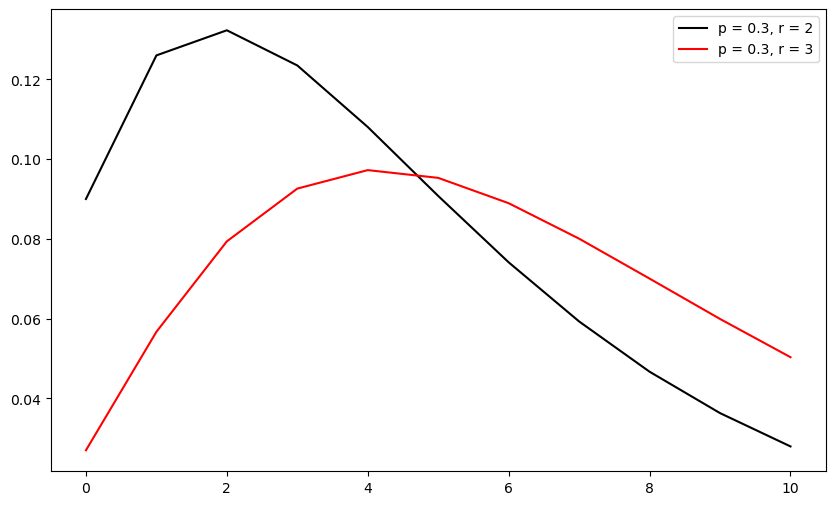

In [19]:
# PMF for negative binomial distribution
p = 0.3
x = np.arange(0,11)
r1 = 2
px1 = st.nbinom.pmf(x, r1, p)
r2 = 3
px2 = st.nbinom.pmf(x, r2, p)

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x, px1, 'k', label = 'p = 0.3, r = 2')
plt.plot(x, px2, 'r', label = 'p = 0.3, r = 3')
plt.legend()
plt.show()

### Exponential distribution

The exponential distribution is related to the Poisson process which underlies the Poisson distribution (a Poisson process is simply one in which events occur at the rate of $\lambda$ per time period). 

Here, instead of modeling the number of events in a **time period**, as we did with the Poisson, we are interested in the **time interval** between events. Unlike the Poisson distribution, therefore, this is a **continuous random** variable. 

<br>

**Mathematical Representation**

With $\lambda$ defined as before, then the PDF for $X \sim E(\lambda)$ measuring the time between events is:

\begin{align}
f(x) & = \lambda e^{-\lambda x}  & & \text{for } x \ge 0 \\
     & = 0 & & \text{otherwise}
\end{align}

for $(x \geq 0)$, where $(\lambda)$ is the rate parameter, and $(e)$ is the base of the natural logarithm.


The exponential distribution is a crucial statistical tool for modeling the time between occurrences in continuous time processes, especially when these events happen independently and at a constant average rate. 

Key features of the Exponential distribution include:
1. **Memorylessness**: One of the unique properties of the Exponential distribution is its *memoryless* nature. This means that the probability of an event occurring in the future is independent of how much time has already elapsed.
2. **Continuous Time**: Unlike the Poisson distribution, which counts occurrences in fixed intervals, the Exponential distribution deals with the time between these occurrences in a continuous space.
3. **Rate Parameter ($\lambda$)**: The rate at which events occur (average number of events in a time unit) is the inverse of the mean time between events.


<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
    <img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/exponential-distribution.png"  style="width:70%";/>
    <br>
    <br>
    <em>Figure 4: Exponential distribution</em>
</div>

Suppose a specific region is prone to forest fires, with an average occurrence **rate of 0.1** per year (or one fire every 10 years, on average). We can use the Exponential distribution to calculate the **probability** of the next fire occurring within a certain timeframe, **say the next 5 years,** which is crucial for planning reforestation and preventive measures.

In [20]:
from scipy.stats import expon

# Average time between forest fires is 10 years, so the rate λ = 0.1 per year
lambda_fire = 0.1
scale_fire = 1 / lambda_fire  # Scale parameter for the Exponential distribution is the inverse of λ

# Probability of a forest fire occurring within the next 5 years
prob_within_5_years_fire = expon.cdf(5, scale=scale_fire)
print(f"Probability of a forest fire occurring within the next 5 years: {prob_within_5_years_fire:.4f}")

Probability of a forest fire occurring within the next 5 years: 0.3935


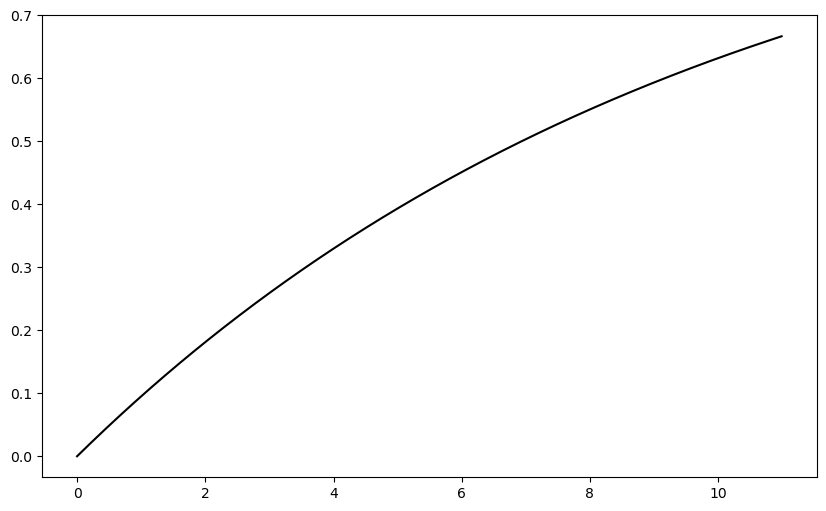

In [21]:
# The cdf for the exponential distribution
lambda_var = 0.1
x = np.arange(0,11,0.01)
dx = st.expon.cdf(x, scale = 1/lambda_var)

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x, dx, 'k')
plt.show()

Understanding the likelihood of forest fires (or other natural disasters) within a specific timeframe allows environmental planners to allocate resources more effectively. For example, if the probability of a fire occurring in the next five years is high, efforts can be focused on fire prevention measures, creating firebreaks, and selecting fire-resistant plant species for reforestation.

### Uniform distribution

As the name suggests, a uniformly distributed random variable will take on any value in a given interval with equal probability. The two key parameters are therefore the lower and upper points of the interval, usually denoted $a$ and $b$ respectively, and $X \sim U(a,b)$ has PDF:

\begin{align}
f(x) & = \displaystyle \frac{1}{b-a} & & \text{for } a \le x \le b \\
     & = 0 & & \text{otherwise}
\end{align}

This looks like the following:

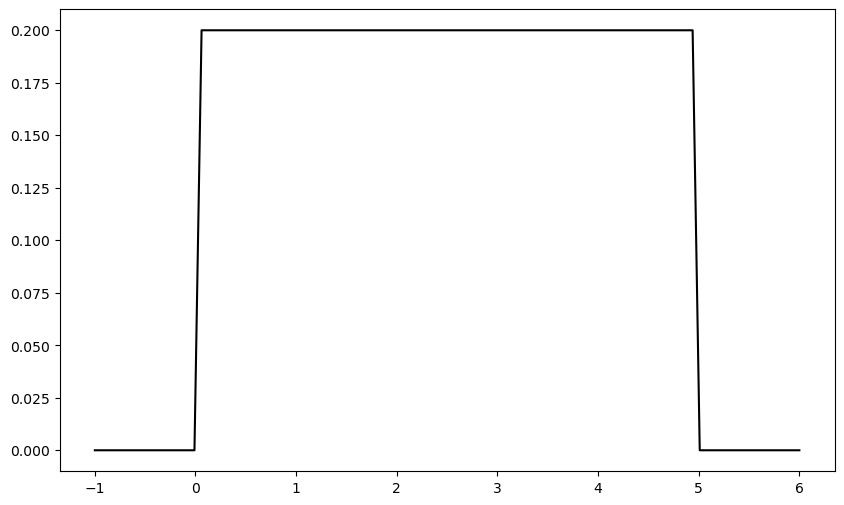

In [30]:
a = 0
b = 5

x = np.linspace(a-1, b+1, 100)
y = st.uniform.pdf(x, loc=a, scale=b-a)

plt.plot(x, y, 'k')


An integration exercise will show that the probability of an observation between $c$ and $d$, where $a < c < d < b$, is equal to $\displaystyle \frac{d - c}{b - a}$, which is intuitively correct given that the essence of a uniform distribution is that every possible observation between the lower and upper bounds is equally likely. Let's test:

In [31]:
a = 0
b = 5
c = 2
d = 3

st.uniform.cdf(d, loc = a, scale =  b-a) - st.uniform.cdf(c, loc = a, scale = b-a)

0.19999999999999996

Note: The 0.19999 instead of 0.2 answer is an example of Python's [floating point precision](https://docs.python.org/3/tutorial/floatingpoint.html) limitations.

## Appendix

* [An Introduction to the Science of Statistics](https://www.math.arizona.edu/~jwatkins/statbook.pdf)
* [Statistics and machine learning](https://towardsdatascience.com/machine-learning-probability-statistics-f830f8c09326)

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>